In [29]:
import matplotlib.pyplot as plt
import json
import math
import os

# Load data from JSON file
with open('/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6WT/mousecys/1-prep/qaf.PlotData.json', 'r') as f:
    data = json.load(f)

# Define colors for each subplot (using a diverse color palette)
colors = ['maroon']  # More colors added

# Define the number of subplots
num_plots = len(data)

# Define the maximum number of subplots per row
max_cols = 4  # Adjust based on your preference for columns per row
num_rows = math.ceil(num_plots / max_cols)  # Calculate rows dynamically

# Create a figure with multiple subplots arranged in grid (rows and columns)
fig, axes = plt.subplots(num_rows, max_cols, figsize=(40, 10 * num_rows))  # Larger figsize for publication quality
axes = axes.flatten()  # Flatten axes for easy iteration

# Iterate over each plot in the data and assign a subplot
for i, (key, value) in enumerate(data.items()):
    for j, (subplot_key, subplot_value) in enumerate(value['subplots'].items()):
        x = subplot_value['xdata']
        y = subplot_value['ydata']

        # Plot the data
        axes[i].plot(x, y, color=colors[j % len(colors)], linewidth=2)

        # Set title and labels for clarity
        axes[i].set_title(value.get('title', 'No Title'), fontsize=14, fontweight='bold')
        axes[i].set_xlabel('E1-E2 [kcal/mol]', fontsize=12)
        axes[i].set_ylabel('Free energy [kcal/mol]', fontsize=12)

        # Add grid for better visibility
        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots (if num_plots < num_rows * max_cols)
for ax in axes[num_plots:]:
    ax.set_visible(False)

# Adjust spacing between subplots for clarity
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.4)

# Ensure the folder exists before saving
output_dir = '/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6WT/mousecys/1-prep'
os.makedirs(output_dir, exist_ok=True)

# Save the figure with a higher DPI for publication
plt.savefig(os.path.join(output_dir, 'mousecys_FreeEnergyProfile.png'), dpi=100)  # High DPI for publication quality

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

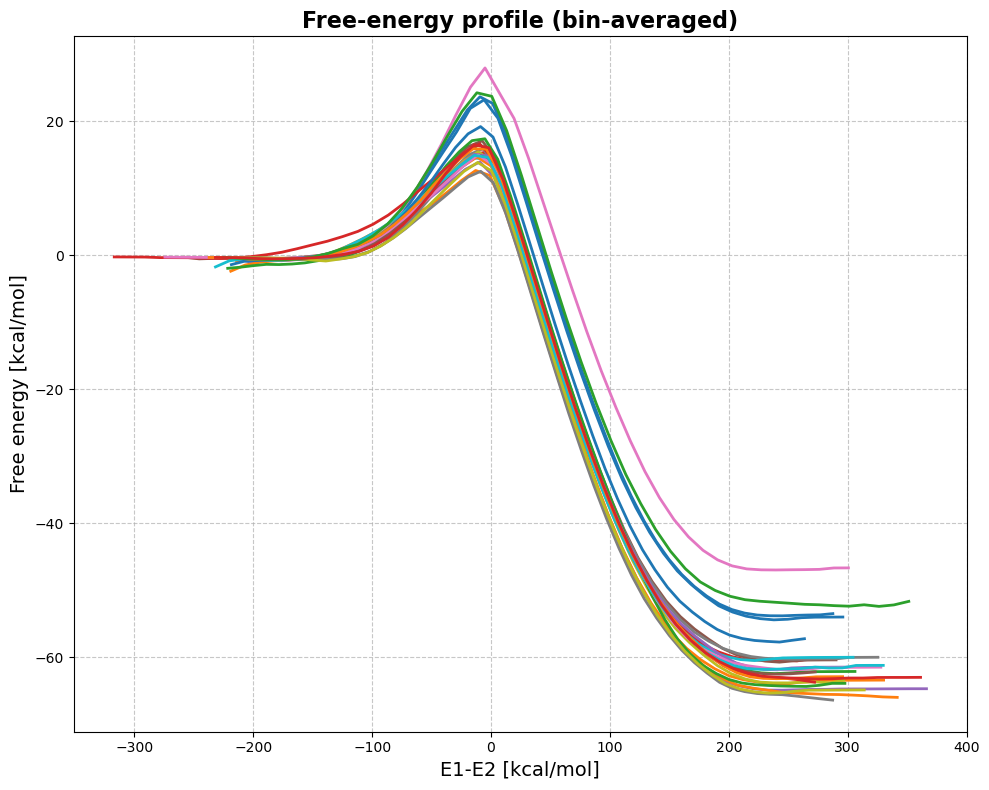

In [28]:
import matplotlib.pyplot as plt
import json
import os

# Load data from JSON file
with open('/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6WT/mousecys/1-prep/qaf.PlotData.json', 'r') as f:
    data = json.load(f)

# Create a single figure for the free energy profiles
fig, ax = plt.figure(figsize=(10, 8)), plt.gca()

# Track if we found any matching plots
found_plots = False

# Find and plot all entries with title "Free-energy profile (bin-averaged)"
for key, value in data.items():
    if value.get('title') == "Free-energy profile (bin-averaged)":
        found_plots = True
        for subplot_key, subplot_value in value['subplots'].items():
            x = subplot_value['xdata']
            y = subplot_value['ydata']
            
            # Label each replica to distinguish them in the plot
            label = f"Replica {key}" if subplot_key == "0" else f"Replica {key}_{subplot_key}"
            
            # Plot with maroon color
            ax.plot(x, y, linewidth=2, label=label)
            
# Set common labels and styling only if plots were found
if found_plots:
    ax.set_title("Free-energy profile (bin-averaged)", fontsize=16, fontweight='bold')
    ax.set_xlabel('E1-E2 [kcal/mol]', fontsize=14)
    ax.set_ylabel('Free energy [kcal/mol]', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)

# Ensure the folder exists before saving
output_dir = '/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6WT/mousecys/1-prep'
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(output_dir, 'mousecys_FreeEnergyProfile_AllReplicas.png'), dpi=300)

plt.tight_layout()
plt.show()